# Brexit Data Analysis

<hr/>


## <font color='blue'>Analyzing Brexit Data</font>

<HR/>

The dataset that we will use contains the results of the E.U. referendum published by the Electoral Commission and the demographics of various regions and districts. This data was retrived from https://www.kaggle.com/electoralcommission/brexit-results and edited for further use.

**Our goal will be to (1) understand the demographics and (2) identify how the demographics influenced the Brexit vote.**

<HR/>


## <font color='blue'>Reading Data</font>
We will start by reading the data into a data frame. The data is in the file "Bexit_data.csv" located in the scratch folder. 

**What are some of the steps you should keep in mind before/during/after reading the data?**

In [2]:
# read the data into a data frame called brexit_data and implement other meaningful steps.
import pandas as pd
brexit_data = pd.read_csv('scratch/Brexit_data.csv')
brexit_data.head()

,ID,Region Code,Region,Area Code,Area,Electorate,Expected Ballots,Verified Ballot Papers,Percent Turnout,Votes Cast,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 and Over
0,108,E12000006,East,E06000031,Peterborough,120892,87474,87469,72.35,87469,...,12677,11014,9642,9382,6909,5792,5026,3803,2258.0,1090.0
1,109,E12000006,East,E06000032,Luton,127612,84633,84636,66.31,84616,...,13538,11225,9267,8346,6542,6102,5032,3408,1877.0,920.0
2,112,E12000006,East,E06000033,Southend-on-Sea,128856,93948,93939,72.90,93939,...,12755,10887,9667,10419,8468,6716,5779,4769,3223.0,1843.0
3,113,E12000006,East,E06000034,Thurrock,109897,79969,79954,72.75,79950,...,11535,9453,8387,8739,5996,4742,3784,2873,1844.0,782.0
4,110,E12000006,East,E06000055,Bedford,119530,86136,86136,72.06,86135,...,11693,10206,8917,9303,7045,5716,4900,3780,2297.0,1130.0


In [3]:
#use the .info function to get info about the data frame 
brexit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      375 non-null    int64  
 1   Region Code             375 non-null    object 
 2   Region                  375 non-null    object 
 3   Area Code               375 non-null    object 
 4   Area                    375 non-null    object 
 5   Electorate              375 non-null    int64  
 6   Expected Ballots        375 non-null    int64  
 7   Verified Ballot Papers  375 non-null    int64  
 8   Percent Turnout         375 non-null    float64
 9   Votes Cast              375 non-null    int64  
 10  Valid Votes             375 non-null    int64  
 11  Remain                  375 non-null    int64  
 12  Leave                   375 non-null    int64  
 13  Rejected Ballots        375 non-null    int64  
 14  No Official Mark        375 non-null    in

**What is the unit of analysis?**

In [5]:
brexit_data['Area'].count()

375

In [6]:
brexit_data['Area'].nunique() 

375

In [7]:
brexit_data['Area Code'].nunique() 

375

**- Since the count of values are the same unique value its safe to say the data is grouped by area by defaut**

**- Which means the data we are working with is showing how the UK voted for brexit in each area**

<BR/>
<BR/>
<HR/>

## <font color='blue'>Initial data exploration</font>

In [8]:
# by using the describe function we can see the mean of leave column is higher than the reamin column indicating that the result might be to leave 
brexit_data.describe()

,ID,Electorate,Expected Ballots,Verified Ballot Papers,Percent Turnout,Votes Cast,Valid Votes,Remain,Leave,Rejected Ballots,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 and Over
count,375.000000,3.750000e+02,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.00000,375.000000,375.000000,375.000000,375.000000,343.000000,343.000000
mean,190.976000,1.219683e+05,88002.816000,87999.040000,73.208000,87997.170667,87930.541333,42273.810667,45656.730667,66.629333,...,12175.146667,10733.010667,9478.032000,9986.96800,7917.482667,6459.384000,5258.496000,4212.445333,2425.947522,1258.822157
std,110.412145,9.755274e+04,63876.189782,63869.946432,5.114145,63867.748972,63818.485642,35841.671303,31366.032691,59.878386,...,9781.295028,8615.448464,7385.480024,7273.32677,5983.243836,4868.965744,3956.922808,3291.352975,1746.671450,889.244673
min,1.000000,1.799000e+03,1424.000000,1424.000000,56.000000,1424.000000,1424.000000,803.000000,621.000000,0.000000,...,175.000000,155.000000,142.000000,172.00000,164.000000,107.000000,81.000000,84.000000,37.000000,33.000000
25%,96.500000,7.256050e+04,54893.000000,54891.000000,70.000000,54887.000000,54855.500000,23555.500000,28706.000000,34.000000,...,7321.000000,6424.500000,5819.500000,6302.00000,5011.500000,4051.000000,3332.000000,2534.000000,1527.000000,777.000000
50%,190.000000,9.609100e+04,72348.000000,72347.000000,74.000000,72348.000000,72309.000000,33427.000000,37576.000000,46.000000,...,9536.000000,8530.000000,7707.000000,8343.00000,6680.000000,5410.000000,4300.000000,3408.000000,2060.000000,1076.000000
75%,287.500000,1.412735e+05,104839.000000,104835.000000,77.000000,104836.500000,104706.500000,48234.000000,54077.000000,74.000000,...,14377.000000,12287.000000,10803.500000,11014.50000,8774.000000,7201.000000,5848.500000,4764.000000,2760.500000,1497.500000
max,381.000000,1.260955e+06,790647.000000,790523.000000,83.000000,790523.000000,790149.000000,440707.000000,349442.000000,614.000000,...,131645.000000,116933.000000,99272.000000,94290.00000,82121.000000,63479.000000,50358.000000,36366.000000,21165.000000,10231.000000


In [9]:
# lets makea a seprate data frame with just the values of reamin and leave to see the final sums 
votes = brexit_data[['Remain','Leave']].sum()
votes

Remain    15852679
Leave     17121274
dtype: int64

In [10]:
# to be extra sure lets make a for loop to diplay the final verdict 

remain = votes[0]
leave = votes[1]
if remain > leave:
    print("Result is to still be a part of EU")
elif remain < leave:
    print('Result is to Leave the EU')
else:
    print('result is undecided')

Result is to Leave the EU


<AxesSubplot:ylabel='None'>

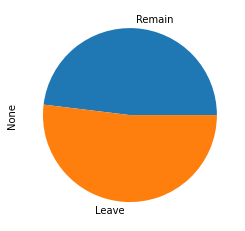

In [11]:
#Lets try to make a pie chart to vizualualize the votes 
votes.plot(kind = 'pie')

<BR/>
<BR/>
<HR/>

## <font color='blue'>Understanding the demographics</font>

In [12]:
#list of region in our data set
brexit_data['Region'].unique() 

array(['East', 'North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'South East',
       'London', 'Northern Ireland', 'Scotland', 'Wales'], dtype=object)

In [13]:
#list of region in our data set
brexit_data['Region'].nunique() 

12

In [14]:
#Lets see how many areas are covered in each region
brexit_data.groupby('Region')['Area Code'].nunique() 

Region
East                        43
East Midlands               40
London                      33
North East                  10
North West                  39
Northern Ireland             1
Scotland                    32
South East                  67
South West                  37
Wales                       22
West Midlands               30
Yorkshire and The Humber    21
Name: Area Code, dtype: int64

In [15]:
#Lets see what is electorate in each region 
brexit_data.groupby('Region')['Electorate'].sum()

Region
East                        4047375
East Midlands               3384299
London                      5424768
North East                  1547979
North West                  5241568
Northern Ireland            1260955
Scotland                    3987112
South East                  6465404
South West                  4114015
Wales                       2270272
West Midlands               4116572
Yorkshire and The Humber    3877780
Name: Electorate, dtype: int64

In [16]:
#lets get a better idea of regions by comparing the no of areas covered and seing the electorate side by side 
brexit_data.groupby('Region').aggregate({'Area':'count','All Residents': 'sum','Electorate':'sum'})

,Area,All Residents,Electorate
Region,,,
East,43,5374122,4047375
East Midlands,40,4533222,3384299
London,33,8173941,5424768
North East,10,2080644,1547979
North West,39,7052177,5241568
Northern Ireland,1,1810863,1260955
Scotland,32,5295500,3987112
South East,67,8634750,6465404
South West,37,5288935,4114015


In [17]:
# lets see the age demographics and their votes in each area 
brexit_data.iloc[:,23:42]

,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 34,Age 35 to 39,Age 40 to 44,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 and Over
0,13904,11424,11349,11498,12502,15046,14112,12914,13289,12677,11014,9642,9382,6909,5792,5026,3803,2258.0,1090.0
1,16592,14221,13211,13561,16621,18812,16064,14066,13796,13538,11225,9267,8346,6542,6102,5032,3408,1877.0,920.0
2,11213,9498,10194,10184,9832,11282,11623,12223,13083,12755,10887,9667,10419,8468,6716,5779,4769,3223.0,1843.0
3,12005,10231,9949,9853,9804,11162,11808,12200,12558,11535,9453,8387,8739,5996,4742,3784,2873,1844.0,782.0
4,10099,9376,9955,10450,9640,10134,10394,10601,11843,11693,10206,8917,9303,7045,5716,4900,3780,2297.0,1130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,5381,5033,5620,6078,5588,5574,5069,5183,6457,6854,6189,5639,6040,4837,3807,3221,2347,1419.0,739.0
371,4637,4771,5684,5729,4311,3812,4067,5075,6836,7641,6539,6281,6897,5630,4440,3718,2678,1683.0,894.0
372,9543,8557,9402,9881,10041,9406,9161,8860,10798,10670,9356,7803,8507,6769,5775,4677,3382,2115.0,1033.0
373,6582,6640,7947,7967,6465,5877,5843,6975,9000,9971,9221,9378,10864,9087,7145,5715,4211,2685.0,1403.0


In [18]:
#to copy the column names for the next code cell
brexit_data.columns

Index(['ID', 'Region Code', 'Region', 'Area Code', 'Area', 'Electorate',
       'Expected Ballots', 'Verified Ballot Papers', 'Percent Turnout',
       'Votes Cast', 'Valid Votes', 'Remain', 'Leave', 'Rejected Ballots',
       'No Official Mark', 'Multiple Marks', 'Writing or Mark',
       'Unmarked or Void', 'Percent Remain', 'Percent Leave',
       'Percent Rejected', 'Type', 'All Residents', 'Age 0 to 4', 'Age 5 to 9',
       'Age 10 to 14', 'Age 15 to 19', 'Age 20 to 24', 'Age 25 to 29',
       'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49',
       'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69',
       'Age 70 to 74', 'Age 75 to 79', 'Age 80 to 84', 'Age 85 to 89',
       'Age 90 and Over'],
      dtype='object')

In [19]:
#lets group the data by region and get the sum of 
brexit_data.groupby('Region')[['Age 0 to 4', 'Age 5 to 9',
       'Age 10 to 14', 'Age 15 to 19', 'Age 20 to 24', 'Age 25 to 29',
       'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49',
       'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69',
       'Age 70 to 74', 'Age 75 to 79', 'Age 80 to 84', 'Age 85 to 89',
       'Age 90 and Over']].sum()

,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 34,Age 35 to 39,Age 40 to 44,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 and Over
Region,,,,,,,,,,,,,,,,,,,
East,329993,300169,316246,328269,323337,333630,332639,353802,395457,398305,348732,314545,346656,274511,220548,184351,140343,87047.0,45542.0
East Midlands,270174,247564,264538,295914,307676,278581,267803,291852,335883,340232,298725,269931,291401,232160,182553,146526,110043,67862.0,33804.0
London,591495,482809,456865,471659,629972,832966,796888,664046,610020,556656,461290,371936,342590,256772,216286,176831,131830,80574.0,42456.0
North East,121971,109644,116488,138806,155690,134057,121921,126362,146628,156125,143468,127101,131447,99803,86465,70319,51114,29416.0,13819.0
North West,432091,392166,412407,456837,489640,466582,429685,450049,514802,522351,465140,409628,439644,342240,285502,227350,167246,99316.0,49501.0
Northern Ireland,124382,111287,119034,126241,126013,124099,119839,122260,131848,131645,116933,99272,94290,82121,63479,50358,36366,21165.0,10231.0
Scotland,293000,269600,291600,330900,363700,345400,321900,339900,394700,410800,375800,331000,336700,261300,220900,178000,230200,0.0,0.0
South East,534235,488058,512875,541684,534287,528057,538471,578011,644796,653258,567834,495765,535399,424290,339405,282391,218727,139576.0,77631.0
South West,296094,272689,296892,328077,333166,307159,296791,322364,375538,389583,350433,323198,361507,297440,235462,195666,153093,99900.0,53883.0


<AxesSubplot:>

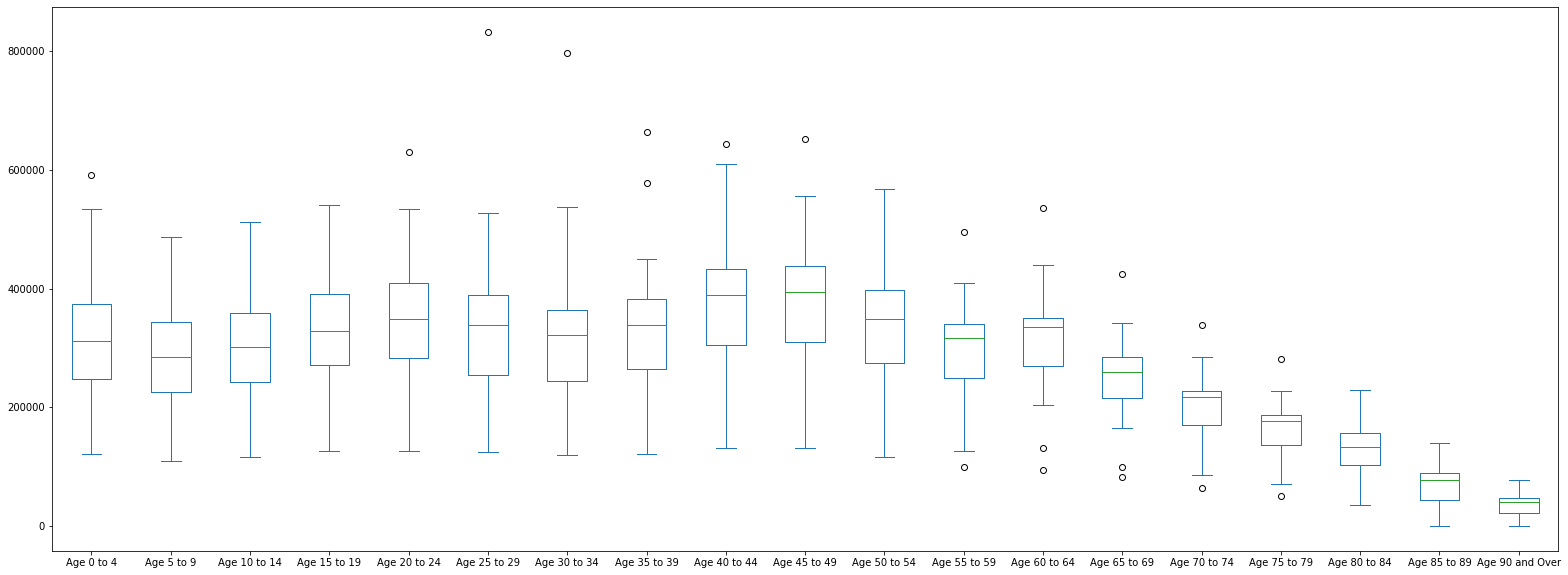

In [20]:
#Lets try to vizualize theses results 
brexit_data.groupby('Region')[['Age 0 to 4', 'Age 5 to 9',
       'Age 10 to 14', 'Age 15 to 19', 'Age 20 to 24', 'Age 25 to 29',
       'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49',
       'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69',
       'Age 70 to 74', 'Age 75 to 79', 'Age 80 to 84', 'Age 85 to 89',
       'Age 90 and Over']].sum().plot(kind = 'box',figsize=(27,10))

<HR/>

## <font color='blue'>Breaking down the results of the referendum</font>

In [21]:
#lets see how many people voted remain and leave 
brexit_data.groupby('Region')['Remain','Leave'].sum()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Remain,Leave
Region,,
East,1305827,1746950
East Midlands,1033036,1475479
London,2263519,1513232
North East,436144,622875
North West,1699020,1966925
Northern Ireland,440707,349442
Scotland,1661191,1018322
South East,2391718,2567965
South West,1483697,1668888


In [22]:
#Northern Ireland voters voted the most to leave 
brexit_data.groupby('Region')['Remain','Leave'].sum().sort_values(by="Leave", ascending = True )

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Remain,Leave
Region,,
Northern Ireland,440707,349442
North East,436144,622875
Wales,772347,854572
Scotland,1661191,1018322
East Midlands,1033036,1475479
London,2263519,1513232
Yorkshire and The Humber,1158298,1580937
South West,1483697,1668888
East,1305827,1746950


<HR/>

## <font color='blue'>Analyzing the influence of demographics</font>

In [23]:
region_data = brexit_data.groupby('Region').agg({'Remain':'sum', 'Leave':'sum'}).sort_values(by = 'Leave', ascending = True)

<AxesSubplot:ylabel='Region'>

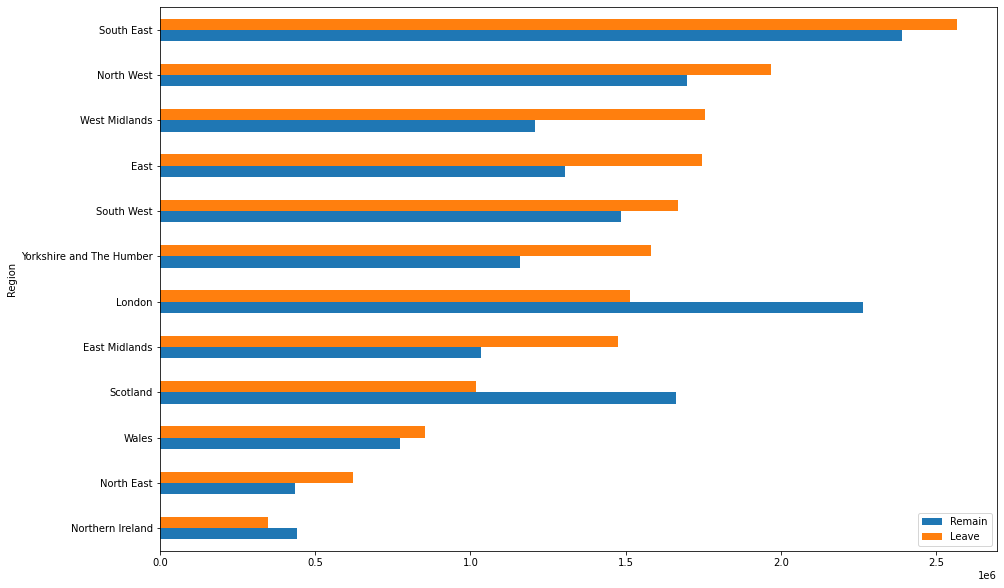

In [24]:
region_data.plot(kind = 'barh',figsize =(15,10))

In [25]:
import numpy as np
region_data = brexit_data.groupby('Region').agg({'Remain':'sum', 'Leave':'sum'})

conditions = [
    (region_data['Remain']>=region_data['Leave']),
    (region_data['Remain']<=region_data['Leave']),
    (region_data['Remain']==region_data['Leave'])
]

# list of choices (result values)
choices = ['Remain', 'Leave', 'Equal']

# call np.select and create the 'result' column
region_data['Result'] = np.select(conditions, choices)
region_data

,Remain,Leave,Result
Region,,,
East,1305827,1746950,Leave
East Midlands,1033036,1475479,Leave
London,2263519,1513232,Remain
North East,436144,622875,Leave
North West,1699020,1966925,Leave
Northern Ireland,440707,349442,Remain
Scotland,1661191,1018322,Remain
South East,2391718,2567965,Leave
South West,1483697,1668888,Leave
